# **Welcome to IEEE x AIS Workshop!**

In this notebook, we will:
1. Create an artificial dataset
2. Import and explore the data
3. Visualize relationships using graphs
4. Preprocess the data
5. Train a Machine Learning Model
6. Evaluate the model's performance


In [1]:
# --- CELL 1: INSTALL & IMPORT REQUIRED LIBRARIES ---
!pip install seaborn scikit-learn

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

## **Step 1: Creating an Artificial Dataset**
To demonstrate data science concepts, we generate a synthetic dataset mimicking electronic component failure.

In [5]:
# --- CELL 2: GENERATE ARTIFICIAL DATASET ---
n_samples = 1000
np.random.seed(42)

data = pd.DataFrame({
    "Voltage_Tolerance": np.random.normal(5, 0.5, n_samples),
    "Temperature_Cycle": np.random.randint(0, 500, n_samples),
    "Humidity_Level": np.random.uniform(10, 90, n_samples),
    "Manufacturing_Defect": np.random.choice([0, 1], n_samples, p=[0.99, 0.01]),
    "Vibration_Exposure": np.random.uniform(0, 5, n_samples),
    "Component_Age": np.random.randint(1, 10, n_samples),
    "Failure_Label": np.random.choice([0, 1], n_samples, p=[0.8, 0.2])
})

print("Sample of Dataset:")
print(data.head())

Sample of Dataset:
   Voltage_Tolerance  Temperature_Cycle  Humidity_Level  Manufacturing_Defect  \
0           5.248357                374       24.815645                     0   
1           4.930868                427       23.928747                     0   
2           5.323844                304       17.871652                     0   
3           5.761515                359       62.824218                     0   
4           4.882923                458       71.149813                     0   

   Vibration_Exposure  Component_Age  Failure_Label  
0            1.737594              3              1  
1            0.251748              1              0  
2            0.263826              5              1  
3            3.460056              5              0  
4            2.289645              6              0  


## **Step 2: Exploring the Dataset**
Before training a model, we need to understand the dataset.

In [6]:
# --- CELL 3: DATA EXPLORATION ---
print("Dataset Overview:")
print(data.describe())

print("\nClass Distribution:")
print(data["Failure_Label"].value_counts())

Dataset Overview:
       Voltage_Tolerance  Temperature_Cycle  Humidity_Level  \
count        1000.000000        1000.000000     1000.000000   
mean            5.009666         253.119000       50.089577   
std             0.489608         145.107412       23.156232   
min             3.379366           0.000000       10.010775   
25%             4.676205         129.000000       30.807567   
50%             5.012650         259.000000       50.331629   
75%             5.323972         381.000000       70.507847   
max             6.926366         499.000000       89.867801   

       Manufacturing_Defect  Vibration_Exposure  Component_Age  Failure_Label  
count           1000.000000         1000.000000    1000.000000    1000.000000  
mean               0.010000            2.447249       4.957000       0.190000  
std                0.099549            1.430310       2.549441       0.392497  
min                0.000000            0.000154       1.000000       0.000000  
25%           

## **Step 3: Visualizing the Data**
We'll use seaborn and matplotlib to analyze feature relationships.


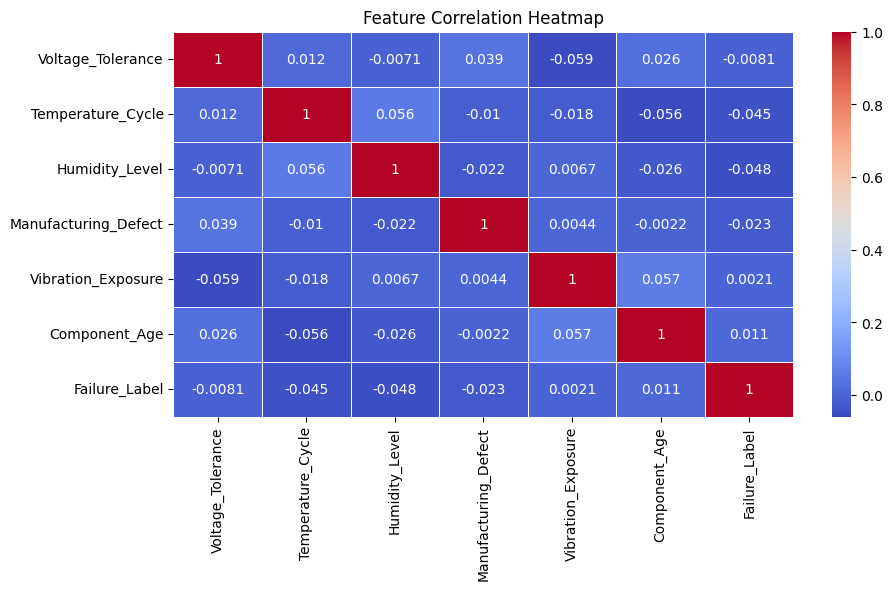

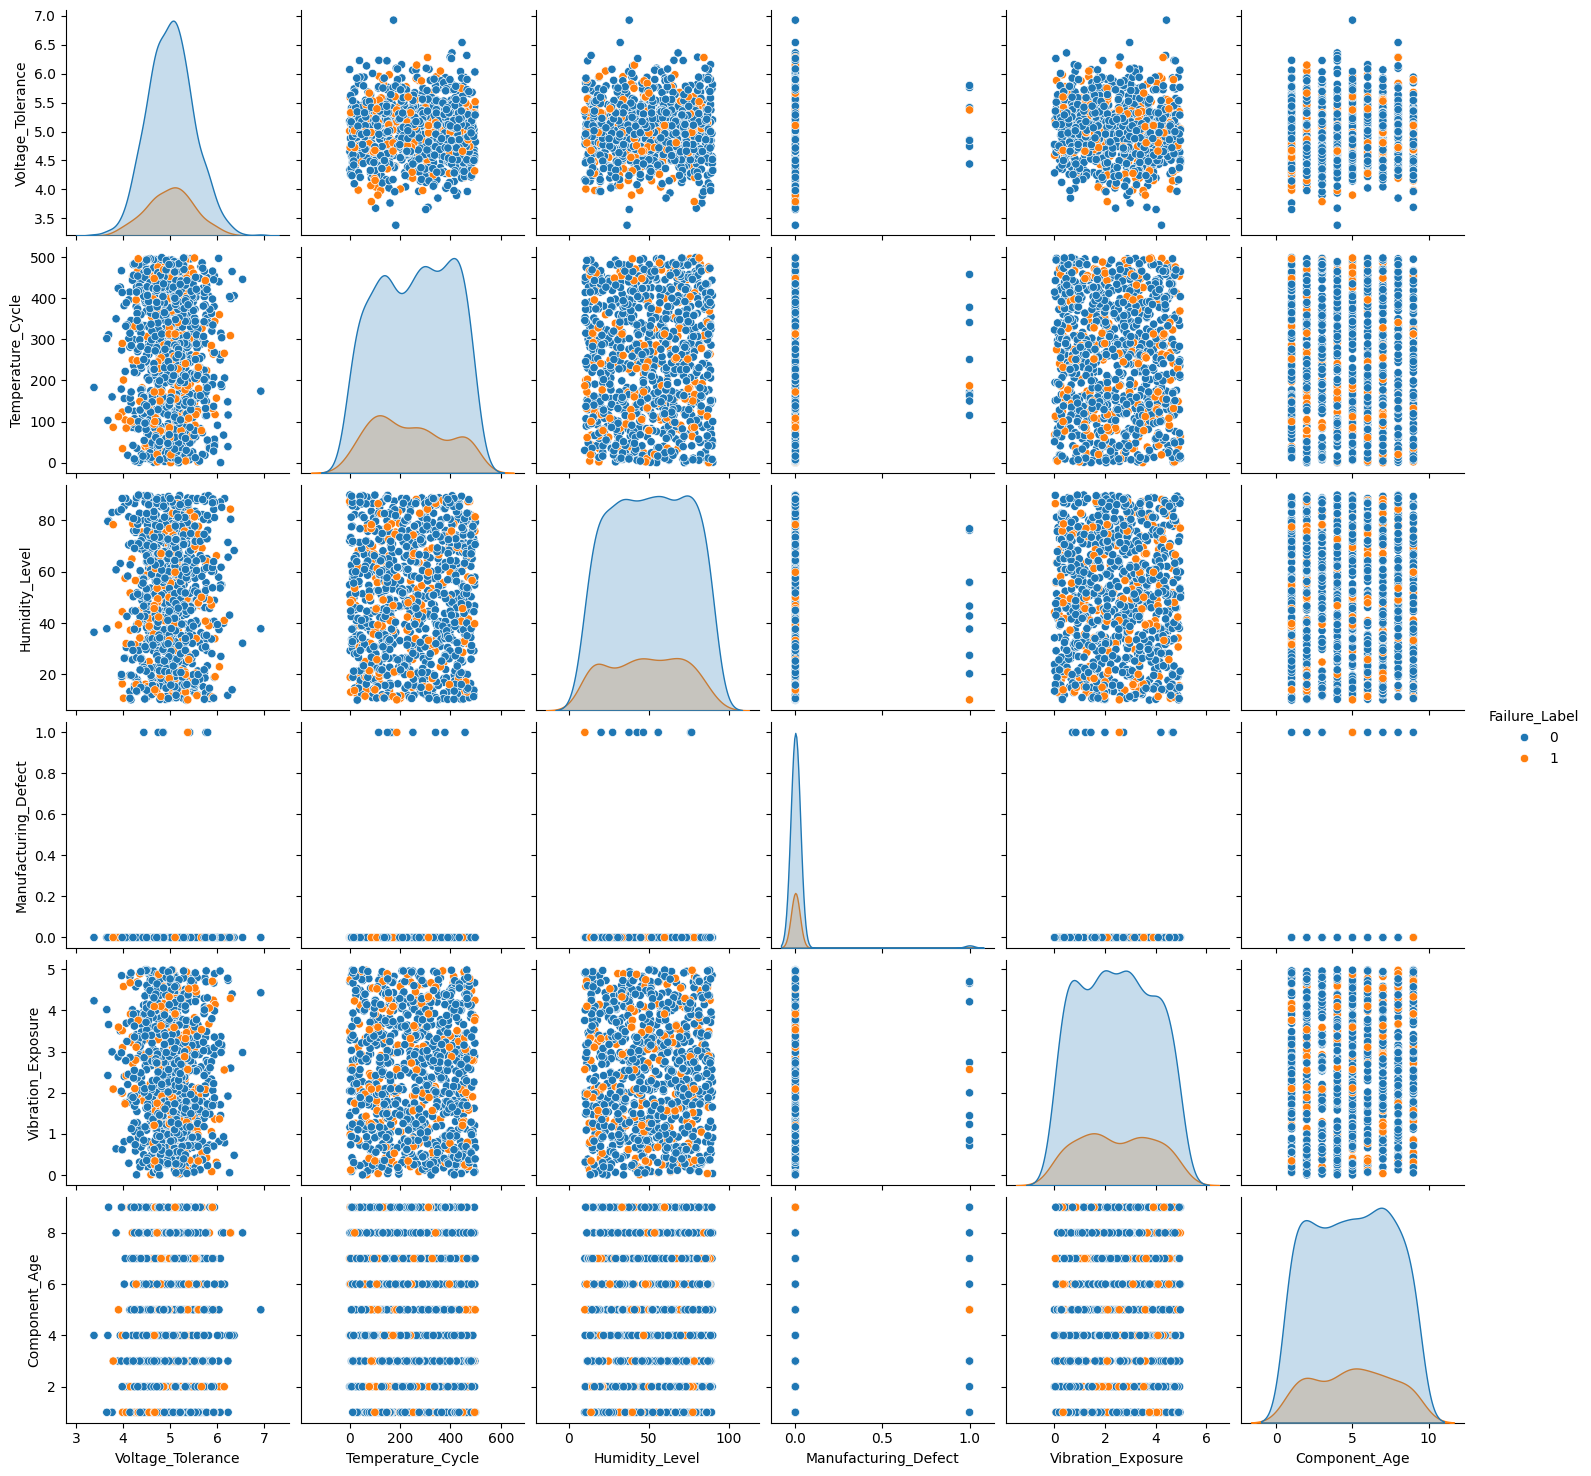

In [7]:
# --- CELL 4: DATA VISUALIZATION ---
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# TODO: Replace ___ with the correct argument for pairplot
sns.pairplot(data, hue="Failure_Label")
plt.show()

## **Step 4: Preprocessing Data**
We need to split the data into training and test sets and normalize it.

In [8]:
# --- CELL 5: PREPROCESSING DATA ---
X = data.drop(columns=["Failure_Label"])
y = data["Failure_Label"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Step 5: Training a Machine Learning Model**
We'll use a Random Forest Classifier to predict failures.

In [9]:
# --- CELL 6: MODEL TRAINING ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## **Step 6: Evaluating the Model**
Checking accuracy and performance of the model.


In [12]:
# --- CELL 7: MODEL EVALUATION ---
y_pred = model.predict(X_test_scaled)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       152
           1       0.00      0.00      0.00        48

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.58      0.76      0.66       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Step 7: Visualizing Performance**
Confusion matrix visualization to interpret model results.

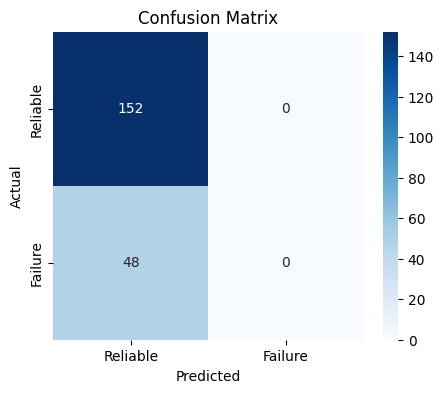

In [15]:
# --- CELL 8: CONFUSION MATRIX ---
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Reliable", "Failure"], yticklabels=["Reliable", "Failure"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
